In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

In [3]:
# The number of i/p features or variables or columns present in the dataset is known as dimension.

# PCA is a way of converting the higher dimesnion data into a lower dimension data by ensuring that it provides similar
# or maximum information

In [4]:
# steps involved in PCA:

# 1) Standardize the datapoints: brings all the data to a same scale.

# 2) Compute the covariance matrix:
#     i) Variance: it is the spread of the data from the mean or the average point.
#     ii) Covariance matrix: it calculates the measure of how two variables vary each other.

# 3) Compute the eigen values and the eigen vectors
#     i) Eigen value ------ magnitude
#     ii) Eigen vectgor -------- directional_link

# 4) sort the eigen values -------- if the eigen values is high, information spread is high

# 5) select the no of pc's ------- scree plot

# 6) interpret the new data

In [6]:
from sklearn.datasets import load_digits

In [7]:
digits = load_digits()

In [8]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [9]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

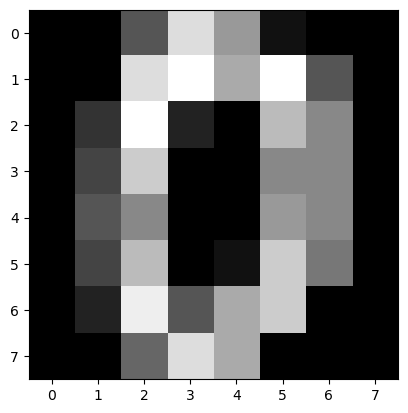

In [12]:
plt.imshow(digits.images[0],cmap=plt.cm.gray)

In [13]:
x = pd.DataFrame(digits.data)
y = pd.DataFrame(digits.target)

In [15]:
# standardization is the scaling technique where we make the mean as 0 and standard deviation as 1
# in pyhton we have the inbuilt function present for it
from sklearn.preprocessing import StandardScaler

In [17]:
x_std = StandardScaler().fit_transform(x)
x_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [18]:
x_std.shape

(1797, 64)

In [20]:
x1 = x_std.T
x1.shape

(64, 1797)

In [22]:
#covariance matrix
cov_mat = np.cov(x1)

In [24]:
cov_mat.shape

(64, 64)

In [28]:
#computing eigen values and eigen vectors 
eigen_val, eigen_vect = np.linalg.eig(cov_mat)

In [29]:
eigen_val #magnitude

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.05037444, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [31]:
eigen_vect #direction

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.18223392, -0.04702701,  0.02358821, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.285868  , -0.0595648 , -0.05679875, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.103198  ,  0.24261778, -0.02227952, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1198106 ,  0.16508926,  0.10036559, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07149362,  0.07132924,  0.09244589, ...,  0.        ,
         0.        ,  0.        ]])

In [32]:
total = sum(eigen_val)
total

61.0339643652563

In [36]:
(7.34477606/61.0339643652563)*100

12.033916093087715

In [37]:
var_exp = [(i/total)*100 for i in eigen_val]

In [59]:
var_exp #percentage of variance captured by individual features

[12.033916097734895,
 9.561054403097852,
 8.444414892624577,
 6.49840790752417,
 4.8601548759664075,
 4.214119869271947,
 3.942082803567392,
 3.389380924638334,
 2.998221011625232,
 2.932002551252211,
 2.781805463550328,
 2.577055092581994,
 2.2753033157642486,
 2.227179739514349,
 2.1652294318492467,
 1.9141666064421248,
 1.7755470851681954,
 1.6380692742844216,
 1.5964601688623403,
 1.4891911870878174,
 1.3479695658179398,
 1.2719313702347568,
 1.1658373505919504,
 1.057646598536322,
 0.9753159471981102,
 0.944558989731997,
 0.8630138269707238,
 0.8366428536685129,
 0.7976932484112439,
 0.7464713709260609,
 0.7255821513702744,
 0.6919112454811818,
 0.6539085355726157,
 0.6407925738459852,
 0.5913841117223431,
 0.5711624052235227,
 0.5236368034166362,
 0.48180758644514166,
 0.08253509448180288,
 0.45371925985844846,
 0.1036957301557182,
 0.4231627532327792,
 0.4060530699790376,
 0.3970848082758281,
 0.1251007424973019,
 0.13511841133708577,
 0.14776269410608814,
 0.16123606225672693,


In [44]:
# cumulative explained variance
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 12.0339161 ,  21.5949705 ,  30.03938539,  36.5377933 ,
        41.39794818,  45.61206805,  49.55415085,  52.94353177,
        55.94175279,  58.87375534,  61.6555608 ,  64.23261589,
        66.50791921,  68.73509895,  70.90032838,  72.81449499,
        74.59004207,  76.22811135,  77.82457152,  79.3137627 ,
        80.66173227,  81.93366364,  83.09950099,  84.15714759,
        85.13246353,  86.07702252,  86.94003635,  87.77667921,
        88.57437245,  89.32084382,  90.04642598,  90.73833722,
        91.39224576,  92.03303833,  92.62442244,  93.19558485,
        93.71922165,  94.20102924,  94.28356433,  94.73728359,
        94.84097932,  95.26414208,  95.67019515,  96.06727995,
        96.1923807 ,  96.32749911,  96.4752618 ,  96.63649786,
        96.80444425,  96.98776275,  97.18327518,  97.38687281,
        97.60512967,  97.83961267,  98.19610598,  98.45528092,
        98.73177018,  99.07255736,  99.36113266,  99.68896799,
       100.        , 100.        , 100.        , 100.  

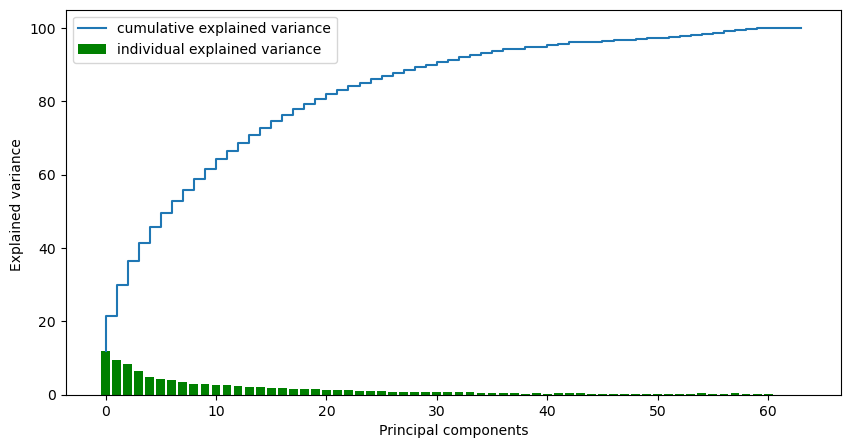

In [45]:
#scree plot
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp,label='cumulative explained variance')
plt.ylabel('Explained variance ')
plt.xlabel('Principal components')
plt.legend()
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,train_size=0.8)

In [48]:
x_train.shape

(1437, 64)

In [50]:
x_test.shape

(360, 64)

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=20)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

In [56]:
pca_x_test.shape

(360, 20)

In [57]:
pca_x_train.shape

(1437, 20)

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dt = DecisionTreeClassifier()

In [62]:
dt.fit(pca_x_train,y_train)

DecisionTreeClassifier()

In [63]:
predict = dt.predict(pca_x_test)

In [64]:
predict

array([7, 6, 5, 9, 6, 4, 4, 9, 1, 5, 3, 2, 0, 5, 1, 7, 5, 7, 6, 9, 4, 2,
       0, 9, 0, 5, 0, 0, 9, 7, 6, 2, 2, 4, 1, 7, 7, 0, 7, 8, 8, 6, 0, 4,
       8, 3, 1, 7, 5, 5, 6, 8, 7, 4, 6, 9, 0, 8, 2, 5, 2, 5, 2, 4, 7, 7,
       0, 8, 7, 7, 1, 2, 9, 6, 0, 3, 6, 6, 6, 5, 6, 4, 1, 2, 1, 0, 4, 3,
       9, 1, 6, 5, 1, 4, 2, 6, 7, 5, 3, 1, 4, 1, 8, 8, 3, 0, 7, 3, 8, 5,
       7, 2, 2, 0, 1, 5, 3, 5, 0, 0, 1, 2, 1, 4, 6, 1, 8, 3, 4, 1, 4, 3,
       4, 6, 8, 1, 6, 6, 4, 9, 1, 2, 2, 0, 3, 7, 8, 6, 1, 8, 7, 9, 8, 1,
       0, 5, 7, 6, 5, 2, 8, 6, 0, 4, 0, 2, 5, 2, 2, 3, 7, 9, 5, 3, 9, 7,
       6, 7, 1, 3, 4, 0, 8, 5, 9, 8, 4, 7, 0, 3, 5, 0, 5, 7, 5, 7, 6, 6,
       2, 1, 1, 6, 5, 2, 0, 6, 3, 7, 3, 8, 9, 1, 1, 2, 6, 9, 0, 7, 7, 8,
       7, 1, 2, 2, 3, 9, 7, 0, 8, 6, 1, 8, 9, 5, 6, 8, 9, 7, 5, 8, 3, 6,
       2, 3, 7, 7, 9, 7, 2, 0, 4, 0, 9, 0, 8, 9, 5, 6, 9, 4, 2, 1, 1, 7,
       8, 6, 9, 0, 2, 1, 2, 3, 8, 2, 2, 9, 1, 5, 8, 9, 8, 3, 4, 6, 3, 6,
       9, 6, 1, 6, 4, 5, 5, 9, 2, 8, 1, 8, 5, 4, 8,

In [65]:
y_test

,0
27,7
1122,6
204,5
1434,9
911,6
...,...
1123,8
1743,8
754,7
403,7


In [66]:
from sklearn.metrics import confusion_matrix

In [68]:
cm = confusion_matrix(y_test,predict)
print(cm)

# here the diagonals in the matrix is returning the correctly classified data
# and the rest other is missclassified data

[[32  0  0  0  0  0  0  0  0  1]
 [ 0 35  2  0  1  0  0  1  3  3]
 [ 0  1 33  3  0  0  0  2  2  0]
 [ 0  0  1 22  0  0  0  0  2  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  1 26  0  1  0  1]
 [ 2  0  0  0  0  0 41  0  1  0]
 [ 0  1  1  0  1  1  0 37  2  1]
 [ 0  2  2  1  0  4  0  0 26  1]
 [ 2  0  0  2  0  3  0  0  0 26]]


In [70]:
from sklearn.metrics import classification_report

In [71]:
cf = classification_report(y_test,predict)

In [73]:
print(cf)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.90      0.78      0.83        45
           2       0.85      0.80      0.83        41
           3       0.79      0.88      0.83        25
           4       0.91      0.97      0.94        30
           5       0.76      0.90      0.83        29
           6       1.00      0.93      0.96        44
           7       0.88      0.84      0.86        44
           8       0.72      0.72      0.72        36
           9       0.79      0.79      0.79        33

    accuracy                           0.85       360
   macro avg       0.85      0.86      0.85       360
weighted avg       0.86      0.85      0.85       360



In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test,predict)

0.8527777777777777